In [2]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from fbprophet import Prophet
from keras.models import Sequential
from keras.layers import Dense, LSTM
import itertools


In [3]:
data = pd.read_csv('yahoo_stock.csv', index_col='Date', parse_dates=True)

dataHigh = data['High']
data_close = data['Close']

In [4]:
train_data = data_close[:'2019']
test_data = data_close['2020':]

In [5]:
model = ARIMA(train_data,order=(2,1,2))
model_fit = model.fit()

C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


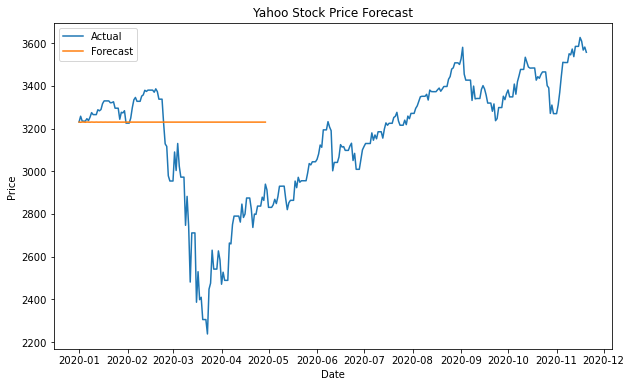

In [6]:
forecast = model_fit.forecast(steps=120)
plt.figure(figsize=(10,6))
plt.plot(test_data, label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Yahoo Stock Price Forecast')
plt.legend()
plt.show()

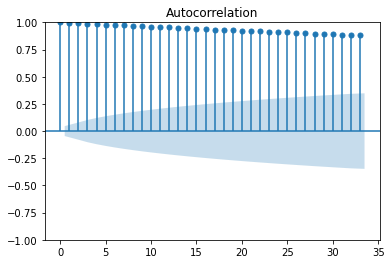

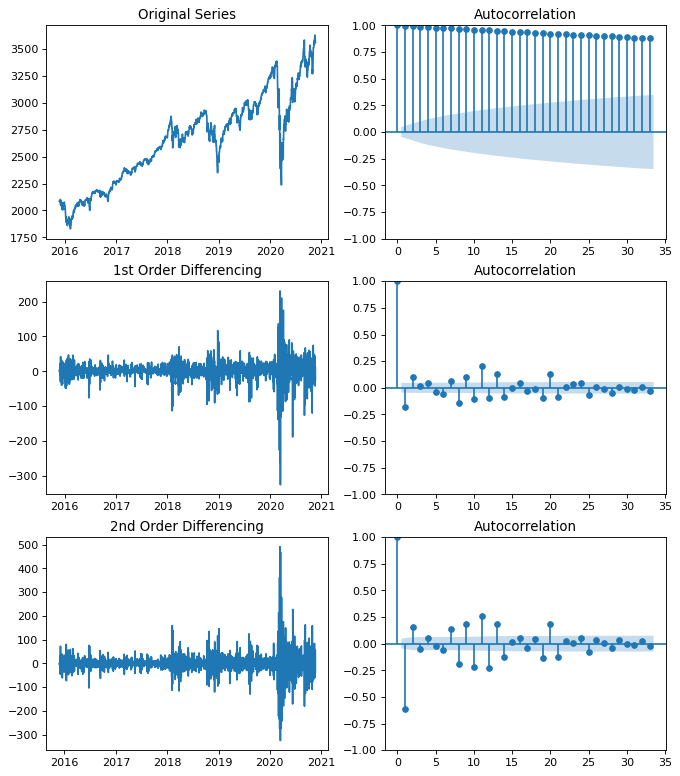

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data.Close)
dc=data_close
plt.rcParams.update({'figure.figsize':(10,12), 'figure.dpi':80})


#original
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(data.Close); axes[0, 0].set_title('Original Series')
plot_acf(data.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.Close.diff().dropna(), ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(data.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.Close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


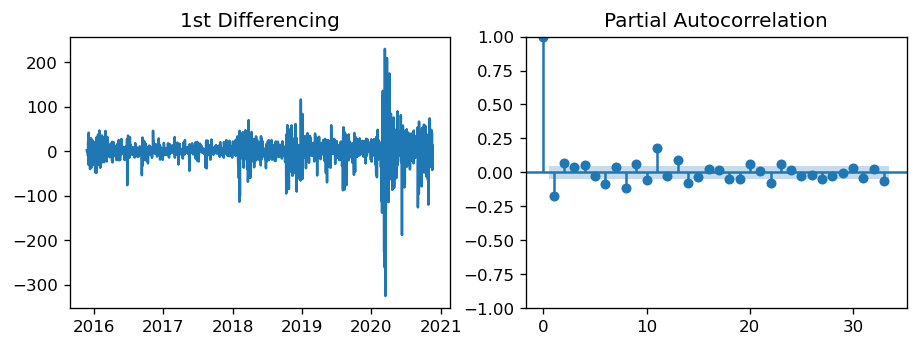

In [7]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(data.Close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.Close.diff().dropna(), ax=axes[1])

plt.show()

In [8]:
model = ARIMA(train_data,order=(1,1,1))
model_fit = model.fit()


model_fit = model.fit()
#print(model_fit.summary())

C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


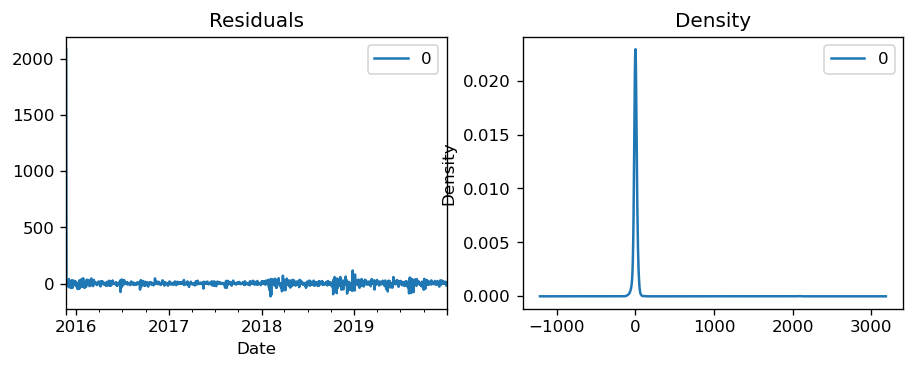

In [9]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [10]:
# Actual vs Fitted
from statsmodels.graphics.tsaplots import plot_predict
res = model.fit()
#plt.plot(res.fittedvalues)
#plt.plot(data.Close)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1500
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6389.168
Date:                Sat, 06 May 2023   AIC                          12784.336
Time:                        12:41:23   BIC                          12800.274
Sample:                    11-23-2015   HQIC                         12790.273
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0286      0.414     -0.069      0.945      -0.840       0.783
ma.L1         -0.0199      0.415     -0.048      0.962      -0.833       0.793
sigma2       294.6723      4.962     59.381      0.000     284.946     304.398
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4260.11
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.61   Skew:                            -0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

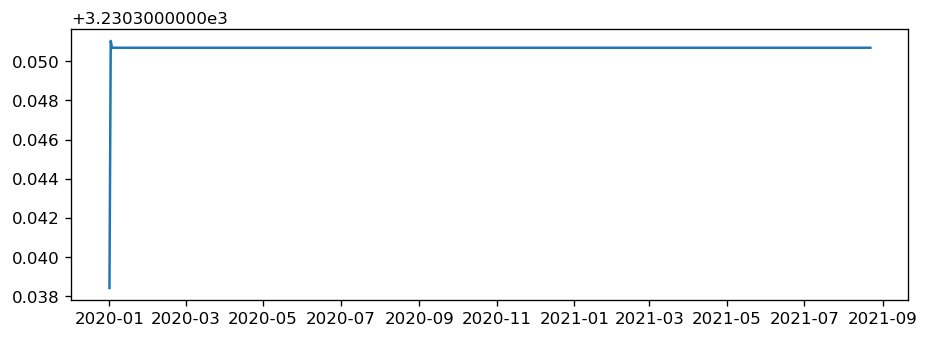

In [11]:
x = res.predict()
#plt.plot(x)
#plt.plot(data.Close)
#data.Close
test = model_fit.forecast(steps=600)
plt.plot(test)

C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


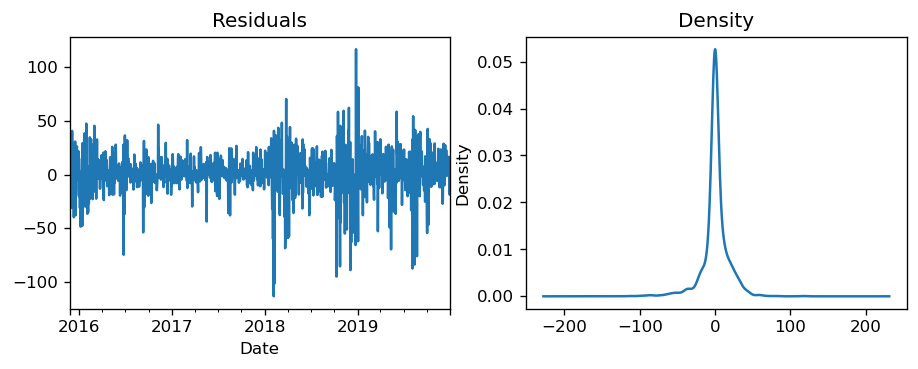

In [12]:
train_data = data_close[:'2019']
test_data = data_close['2020':]
model1 = ARIMA(train_data,order=(1,1,0))
model_fit=model.fit()
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [100]:
forecast_test = model_fit.forecast(len(test_data))

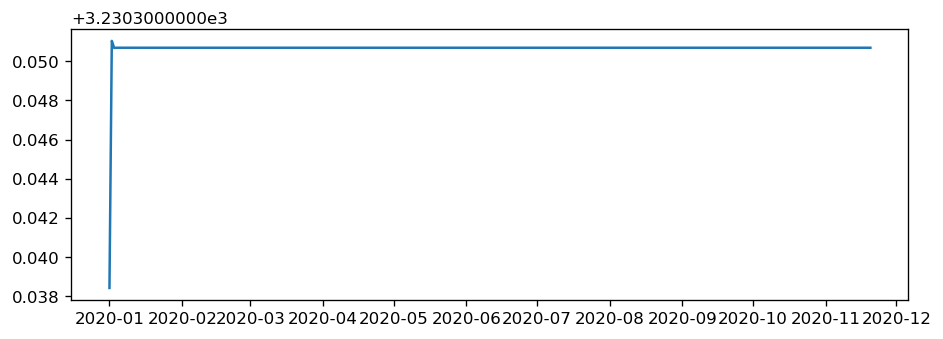

In [108]:
data['forecast'] = [None]*len(train_data) + list(forecast_test)
plt.plot(data.forecast)

<AxesSubplot:>

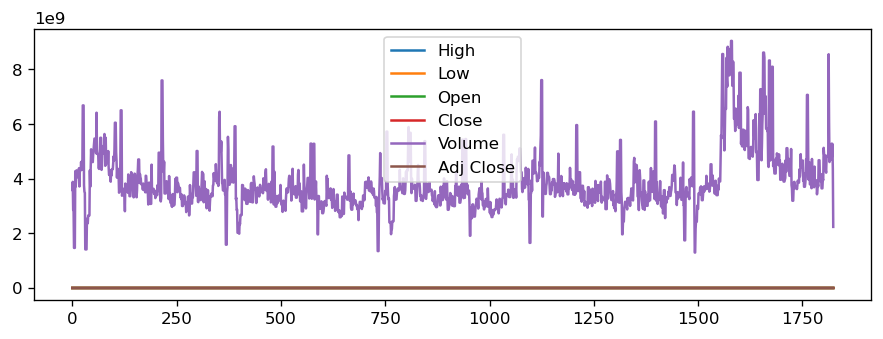

In [118]:
df = pd.read_csv('yahoo_stock.csv')
df.plot()

In [119]:
df.Date = pd.to_datetime(df['Date'])
#df.set_index('Date',inplace=True)


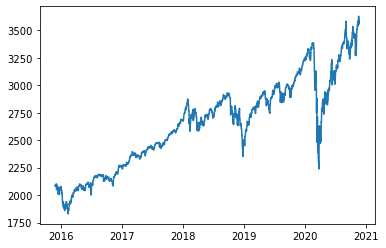

In [10]:
#df.set_index('Date',inplace=True)
df1 = data['Close']
plt.plot(df1)

In [9]:
model=ARIMA(train_data,order=(2,1,0))
model_fit = model.fit()
model_fit.predict(n_periods=325)#,index=test_data.index)

C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2015-11-23       0.000000
2015-11-24    2086.560332
2015-11-25    2089.014343
2015-11-26    2088.872782
2015-11-27    2088.871218
                 ...     
2019-12-27    3239.109017
2019-12-28    3239.947221
2019-12-29    3240.019570
2019-12-30    3240.020020
2019-12-31    3222.197524
Freq: D, Name: predicted_mean, Length: 1500, dtype: float64

<AxesSubplot:xlabel='Date'>

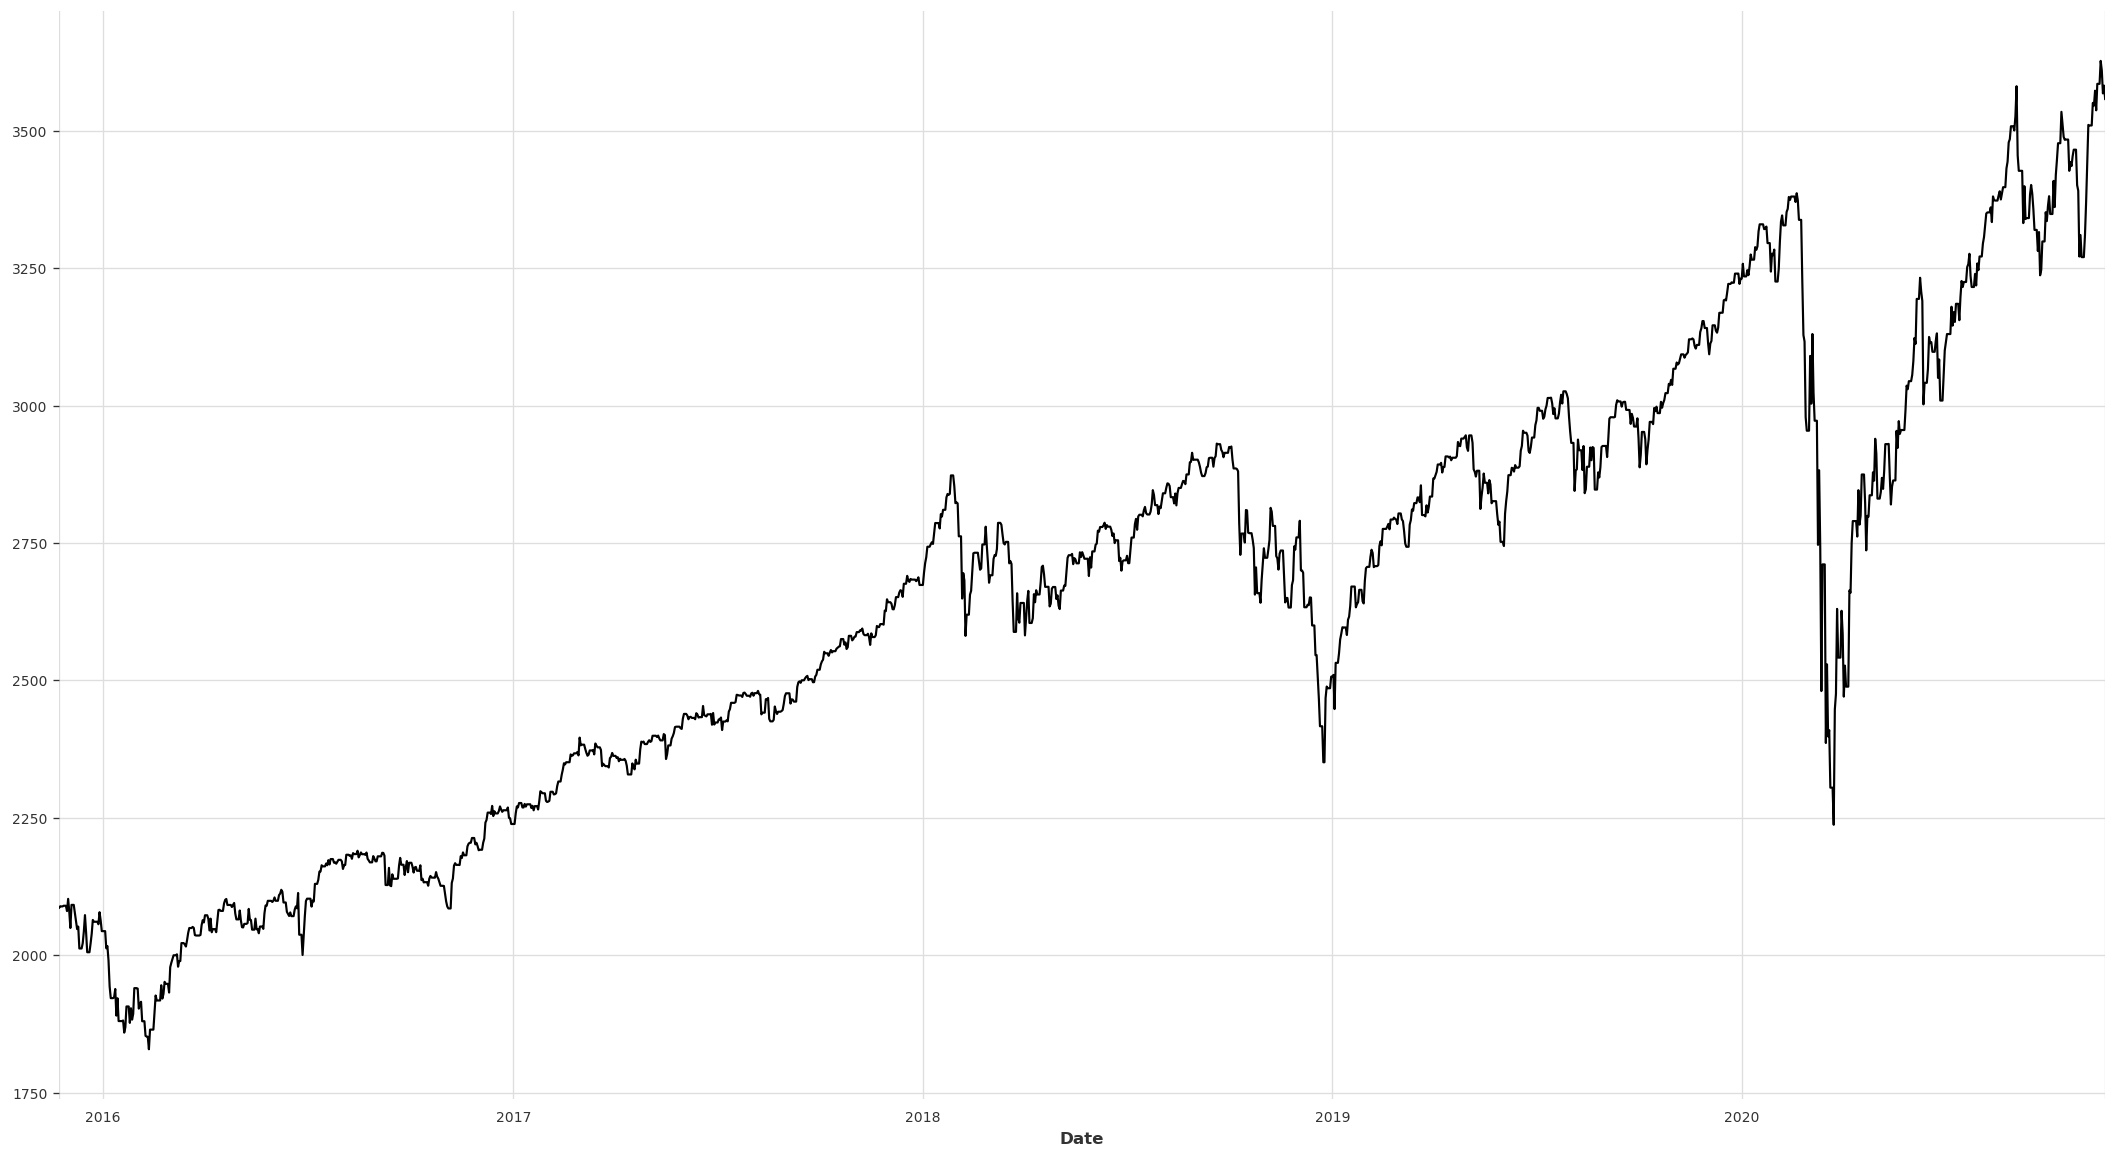

In [62]:
df1.plot()

In [63]:
from statsmodels.tsa.stattools import adfuller
#!hence non-stationary
#hence stationary data?
adfuller(df1)

(-0.8703973870161126,
 0.7975646340657568,
 23,
 1801,
 {'1%': -3.4339861159726306,
  '5%': -2.863146142843122,
  '10%': -2.5676250581282964},
 16826.469381922303)

In [11]:
train_data = data_close[:'2019']
test_data = data_close['2020':]

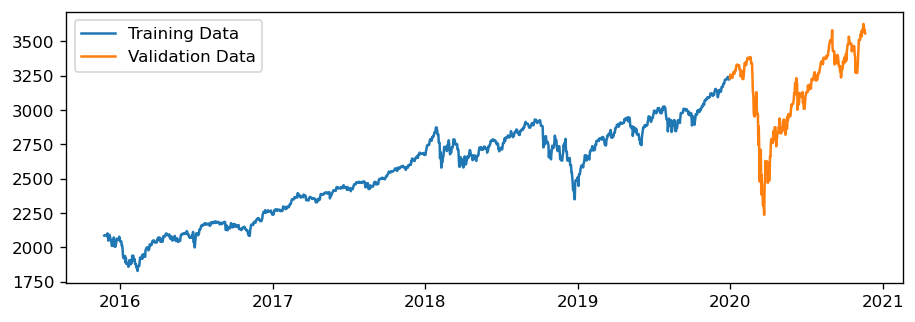

In [45]:
plt.plot(train_data,label="Training Data")
plt.plot(test_data,label='Validation Data')
plt.legend()
plt.show()

In [13]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train_data)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -6381.572
Date:                Mon, 08 May 2023   AIC                          12775.145
Time:                        12:20:08   BIC                          12807.020
Sample:                    11-23-2015   HQIC                         12787.020
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1171      1.239      1.709      0.087      -0.311       4.545
ar.L1         -0.9978      0.091    -10.958      0.000      -1.176      -0.819
ar.L2         -0.7750      0.097     -8.015      0.000      -0.965      -0.586
ma.L1          0.9427      0.099      9.528      0.000       0.749       1.137
ma.L2          0.7157      0.107      6.677      0.000       0.506       0.926
sigma2       291.9389      5.201     56.134      0.000     281.746     302.132
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              3911.76
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               2.63   Skew:                            -0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
arima_model.order

(2, 1, 2)

In [33]:
pred = pd.DataFrame(arima_model.predict(n_periods=325),index=test_data.index)
#pred1 = pd.DataFrame(model_fit.predict(n_periods=325),index=test_data.index)

In [10]:
pred.columsn=['predicted close']
#pred1.columsn=['predicted close']


C:\Users\jepp5\AppData\Local\Temp\ipykernel_14384\2465331170.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pred.columsn=['predicted close']


NameError: name 'pred' is not defined

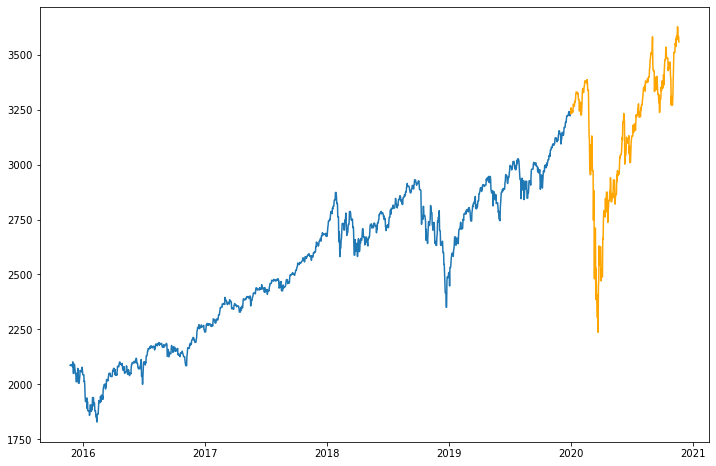

In [7]:
plt.figure(figsize=(12,8))
plt.plot(train_data,label="Training",color='tab:blue')
plt.plot(test_data,label='Validation',color='orange')
plt.plot(pred,label="Arima Prediction",color='green')
plt.legend(loc='upper left')
plt.show()

In [172]:
from hana_ml.algorithms.pal.tsa.seasonal_decompose import seasonal_decompose

stats,decompose = seasonal_decompose(data=df1)

ModuleNotFoundError: No module named 'hana_ml'

Text(0.5, 1.0, 'Residuals')

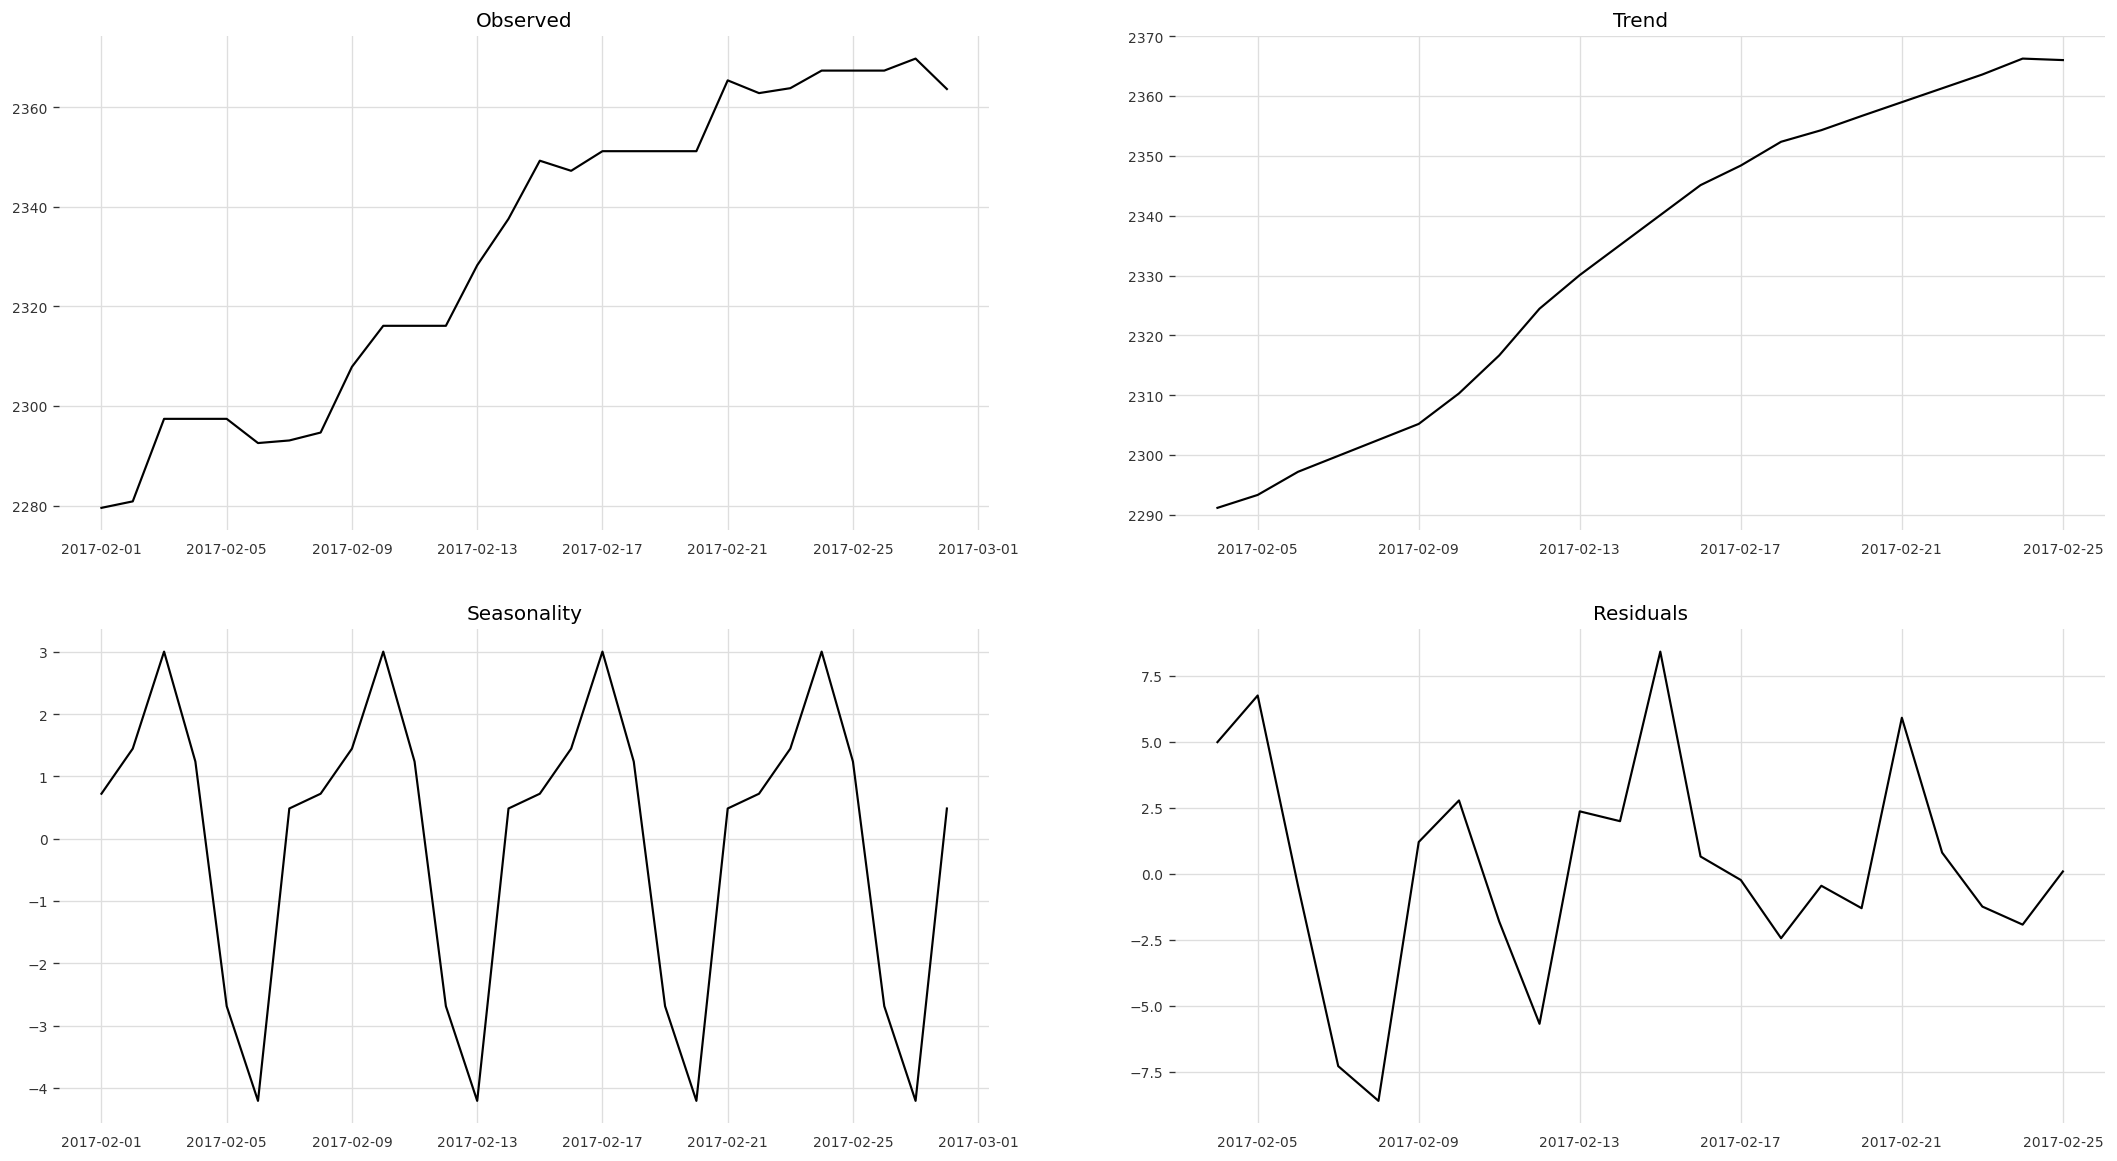

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
#using only 2017 feb to see seasonality

test = df1['2017-02':'2017-02']
season = seasonal_decompose(test)
#season.plot()
#Seasonality seems to be weekly


plt.rcParams.update({'figure.figsize':(22,12), 'figure.dpi':120})
fig, axes = plt.subplots(2, 2, sharex=False)
axes[0,0].plot(season.observed); axes[0,0].set_title('Observed')
axes[0,1].plot(season.trend); axes[0,1].set_title('Trend')
axes[1,0].plot(season.seasonal);axes[1,0].set_title('Seasonality')
axes[1,1].plot(season.resid);axes[1,1].set_title('Residuals')

#plot_acf(data.Close, ax=axes[0, 1])

In [ ]:
#Since theres seasonality, SARIMA will likely perform better

<AxesSubplot:xlabel='Date'>

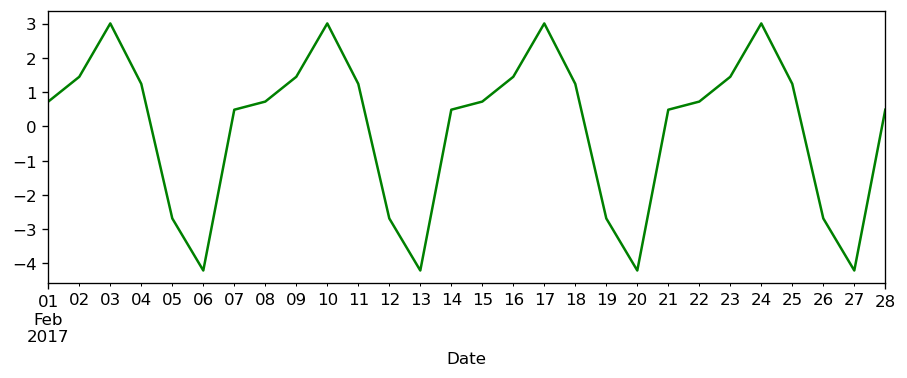

In [190]:

seasonality = season.seasonal
seasonality.plot(color='green')
#data = df1.Close.diff(52)
#plt.plot(data)

In [192]:
p,d,q=arima_model.order

In [14]:
import statsmodels.api as sm
#timesteps per seasonlity = 7
#
sarim = sm.tsa.statespace.SARIMAX(df1,order=arima_model.order,seasonal_order=(1,1,1,7))
#Still sarima model, as exog parameters not passed 
sar_res = sarim.fit() 

C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jepp5\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
df1['sar']=sar_res.predict(start=len(train_data))


In [16]:
df1[['Close','sar']].plot(figsize=(12,8))

KeyError: "['Close'] not in index"

In [17]:
sar_pred = pd.DataFrame(sar_res.predict(start=len(train_data)),index=test_data.index)

In [1]:
#plt.plot(train_data,label="Training values")
plt.plot(test_data,label='Validation',color='tab:blue',lw=3)
#plt.plot(train_data,label='train')
plt.plot(sar_pred,label="Sarimax Prediction",color='red',lw=3)
plt.legend(loc='upper left')
plt.show()

NameError: name 'plt' is not defined

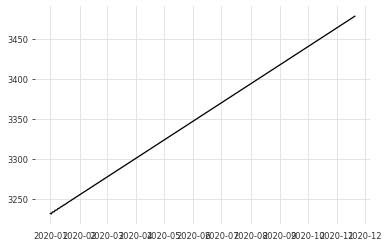

In [35]:
from darts.metrics import mape
plt.plot(pred)

In [31]:
def mean_absolute_percentage_error(y_true, y_pred):  #Source: https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn/294069#294069
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [50]:
print("Mape for SARIMAX:",mean_absolute_percentage_error(test_data,sar_pred))
print("Mape for AUTOARIMA",mean_absolute_percentage_error(test_data,pred))
print("test",mape(validation,sar_pred))

Mape for SARIMAX: 10.373762635250953
Mape for AUTOARIMA 8.926766513542372


AttributeError: 'DataFrame' object has no attribute 'width'

In [47]:
sar_pred.shape

(325, 1)

In [278]:
lstmmodel = keras.Sequential()
train_data = data_close[:'2019']
test_data = data_close['2020':]
lstmmodel.add(LSTM(59,return_sequences=True,input_shape=(59,train_data.shape[-1])))

In [280]:
lstmmodel.add(Dropout(rate=0.2))
lstmmodel.add(Bidirectional(LSTM((59*2),return_sequences=True)))

In [281]:
lstmmodel.add(Dense(units=1))
lstmmodel.add(Activation('linear'))

In [283]:
batch_size=16
lstmmodel.compile(loss='mean_squared_error',optimizer='adam')

In [289]:
seq_len = 60
def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])
def get_train_test_sets(data, seq_len, train_frac):
    sequences = split_into_sequences(data, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    x_train = sequences[:n_train, :-1]
    y_train = sequences[:n_train, -1]
    x_test = sequences[n_train:, :-1]
    y_test = sequences[n_train:, -1]
    return x_train, y_train, x_test, y_test
x_train, y_train, x_test, y_test = get_train_test_sets(data_close, seq_len, train_frac=0.9)

In [21]:
from darts.models import BlockRNNModel
lstm_model = BlockRNNModel(model='LSTM',input_chunk_length=120,output_chunk_length=10,n_epochs=100)

In [22]:
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

df = pd.read_csv('yahoo_stock.csv')

In [23]:
tsClose = TimeSeries.from_dataframe(df,'Date','Close')
tsOpen = TimeSeries.from_dataframe(df,'Date','Open')
tsHigh = TimeSeries.from_dataframe(df,'Date','High')
tsLow = TimeSeries.from_dataframe(df,'Date','Low')
tsAdjClose = TimeSeries.from_dataframe(df,'Date','Adj Close')

scClose,scOpen,scHigh,scLow,scAdjClose=Scaler(),Scaler(),Scaler(),Scaler(),Scaler()

sctsClose = scClose.fit_transform(tsClose)
sctsOpen = scOpen.fit_transform(tsOpen)
sctsHigh = scOpen.fit_transform(tsHigh)
sctsLow = scOpen.fit_transform(tsLow)
sctsAdjClose = scOpen.fit_transform(tsAdjClose)

split='2020-01-01'

trainclose,testclose = tsClose.split_before(pd.Timestamp(split))

ScTrainClose,ScTestClose = sctsClose.split_before(pd.Timestamp(split))
ScTrainOpen,ScTestOpen = sctsOpen.split_before(pd.Timestamp(split))
ScTrainHigh,ScTestHigh = sctsHigh.split_before(pd.Timestamp(split))
ScTrainLow,ScTestLow = sctsLow.split_before(pd.Timestamp(split))
ScTrainAdjClose,ScTestAdjClose = sctsAdjClose.split_before(pd.Timestamp(split))

In [24]:
lstm_model.fit(series=[ScTrainClose])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | fc            | Sequential       | 260   
---------------------------------------------------
3.1 K     Trainable params
0         Non-trainable params
3.1 K     Total params
0.012     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


BlockRNNModel(model=LSTM, hidden_dim=25, n_rnn_layers=1, hidden_fc_sizes=None, dropout=0.0, input_chunk_length=120, output_chunk_length=10, n_epochs=100)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

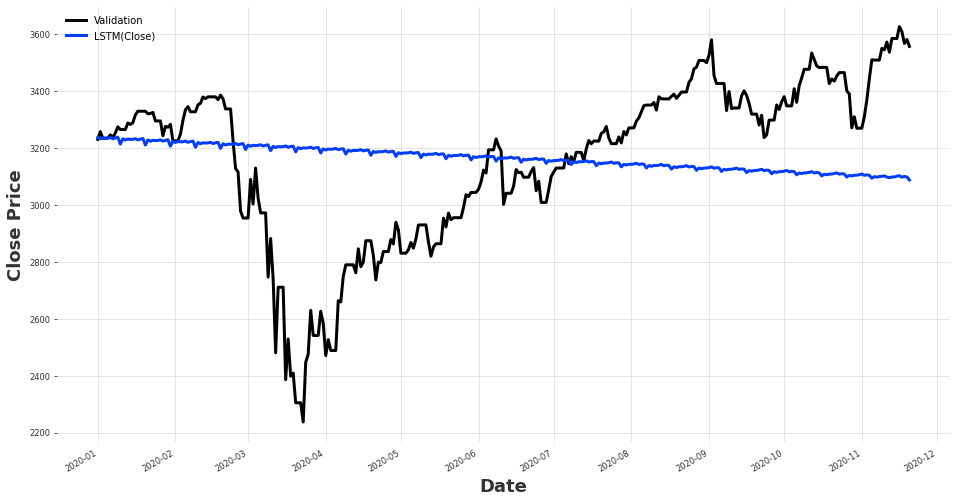

In [26]:
predictionLSTM1 = lstm_model.predict(n=len(ScTestClose), series=ScTrainClose)
predictionLSTM1 = scClose.inverse_transform(predictionLSTM1)
plt.figure(figsize=(16,8))
plt.title('LSTM Forecasting of Yahoo Stock')
testclose.plot(label='Validation',lw=3)
predictionLSTM1.plot(label='LSTM(Close)', lw=3)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()
plt.show()

In [40]:
lstm_model.fit(series=[ScTrainClose,ScTrainOpen])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | fc            | Sequential       | 260   
---------------------------------------------------
3.1 K     Trainable params
0         Non-trainable params
3.1 K     Total params
0.012     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


BlockRNNModel(model=LSTM, hidden_dim=25, n_rnn_layers=1, hidden_fc_sizes=None, dropout=0.0, input_chunk_length=120, output_chunk_length=10, n_epochs=100)

In [35]:
predictionLSTM = lstm_model.predict(n=len(ScTestClose), series=ScTrainClose)
predictionLSTM = scClose.inverse_transform(predictionLSTM)

NameError: name 'lstm_model' is not defined

NameError: name 'predictionLSTM' is not defined

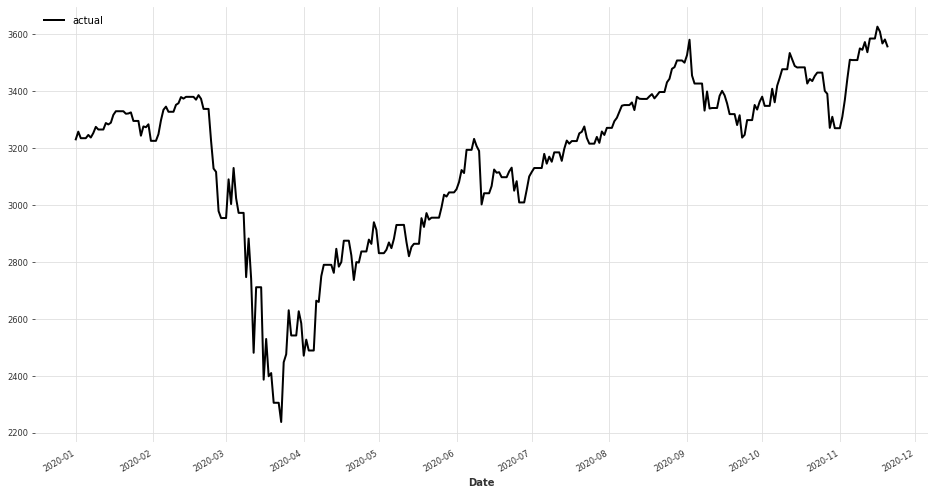

In [34]:
plt.figure(figsize=(16,8))
plt.title('LSTM Forecasting of Yahoo Stock')
testclose.plot(label='Validation')
predictionLSTM.plot(label='LSTM(close,open))', lw=3)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()
plt.show()

In [335]:
lstm_model.fit(series=[ScTrainClose,ScTrainOpen,ScTrainHigh,ScTrainLow,ScTrainAdjClose])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | fc            | Sequential       | 260   
---------------------------------------------------
3.1 K     Trainable params
0         Non-trainable params
3.1 K     Total params
0.012     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


BlockRNNModel(model=LSTM, hidden_dim=25, n_rnn_layers=1, hidden_fc_sizes=None, dropout=0.0, input_chunk_length=120, output_chunk_length=10, n_epochs=100)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

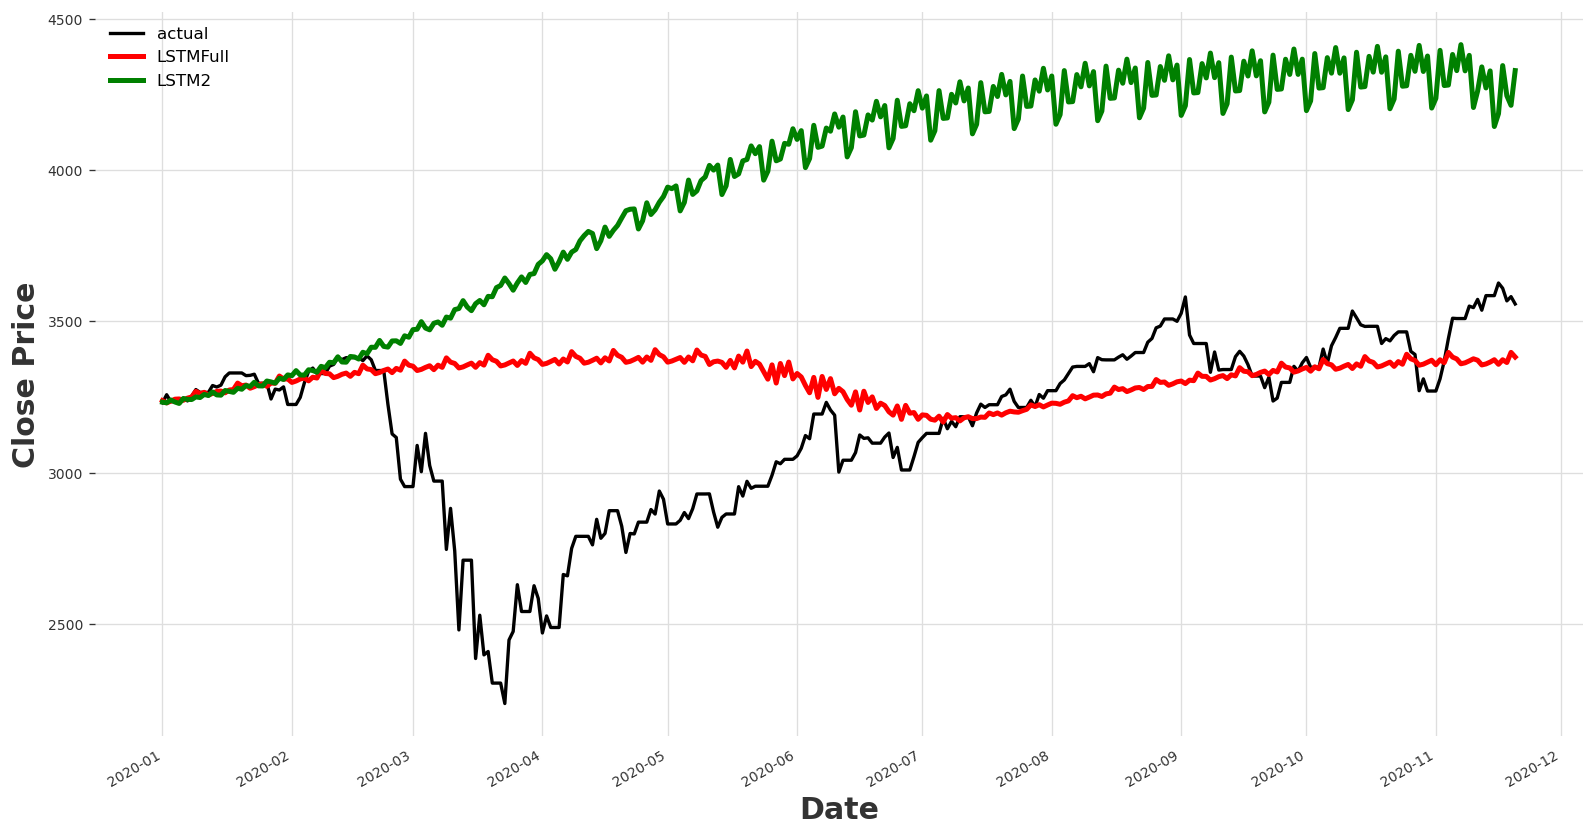

In [338]:
predictionLSTMFull = lstm_model.predict(n=len(ScTestClose), series=ScTrainClose)
predictionLSTMFull = scClose.inverse_transform(predictionLSTMFull)


plt.figure(figsize=(16,8))
plt.title('Yahoo Stock Price Prediction')
testclose.plot(label='actual',color='black')
predictionLSTMFull.plot(label='LSTMFull', lw=3,color='red')
predictionLSTM.plot(label='LSTM2',lw=3,color='green')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()
plt.show()

In [351]:
lstm_model.fit(series=[ScTrainClose])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | fc            | Sequential       | 260   
---------------------------------------------------
3.1 K     Trainable params
0         Non-trainable params
3.1 K     Total params
0.012     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


BlockRNNModel(model=LSTM, hidden_dim=25, n_rnn_layers=1, hidden_fc_sizes=None, dropout=0.0, input_chunk_length=120, output_chunk_length=10, n_epochs=100)

In [352]:
predictionLSTMClose = lstm_model.predict(n=len(ScTestClose), series=ScTrainClose)
predictionLSTMClose = scClose.inverse_transform(predictionLSTMClose)

lstm_model.fit(series=[ScTrainClose,ScTrainOpen,ScTrainHigh])
predictionLSTM3 = lstm_model.predict(n=len(ScTestClose), series=ScTrainClose)
predictionLSTM3 = scClose.inverse_transform(predictionLSTM3)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | fc            | Sequential       | 260   
---------------------------------------------------
3.1 K     Trainable params
0         Non-trainable params
3.1 K     Total params
0.012     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

In [353]:
lstm_model.fit(series=[ScTrainClose,ScTrainOpen,ScTrainHigh,ScTrainLow])
predictionLSTM4 = lstm_model.predict(n=len(ScTestClose), series=ScTrainClose)
predictionLSTM4 = scClose.inverse_transform(predictionLSTM4)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | fc            | Sequential       | 260   
---------------------------------------------------
3.1 K     Trainable params
0         Non-trainable params
3.1 K     Total params
0.012     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

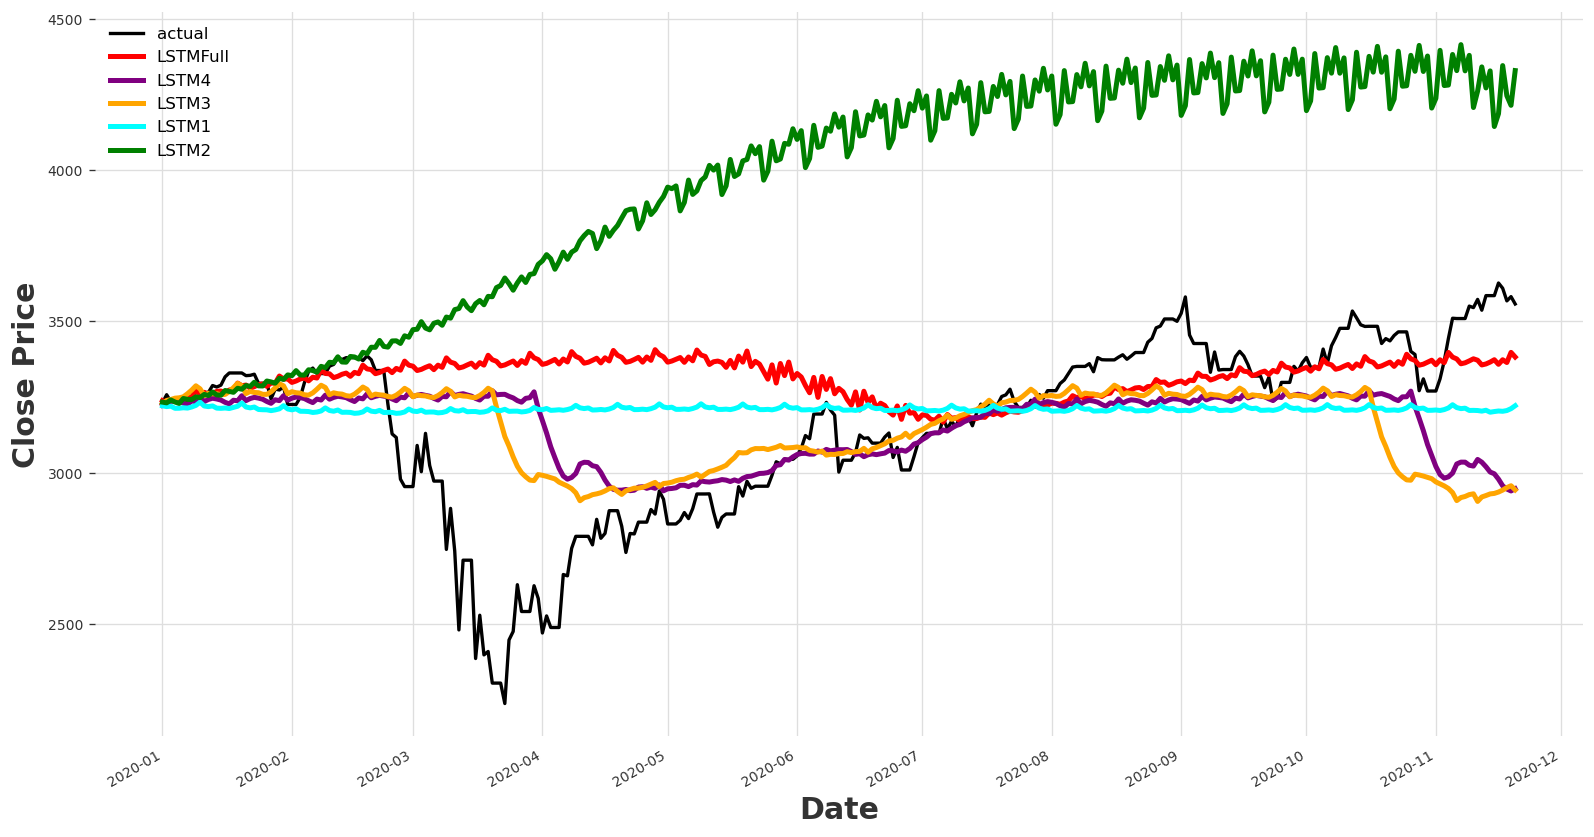

In [355]:
plt.figure(figsize=(16,8))
plt.title('Yahoo Stock Price Prediction')
testclose.plot(label='Validation',color='black')
predictionLSTMFull.plot(label='LSTMFull', lw=3,color='red')
predictionLSTM4.plot(label='LSTM4',lw=3,color='purple')
predictionLSTM3.plot(label='LSTM3',lw=3,color='orange')
predictionLSTMClose.plot(label='LSTM1',lw=3,color='cyan') #Only close value
predictionLSTM.plot(label='LSTM2',lw=3,color='green') #close + open
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()
plt.show()

In [27]:
#print("Mape for SARIMAX:",mean_absolute_percentage_error(testclose,predictionLSTMFull))
print("Mape for AUTOARIMA",mean_absolute_percentage_error(test_data,pred))

NameError: name 'mean_absolute_percentage_error' is not defined

In [42]:
validation = testclose.pd_dataframe()


In [41]:
validation = testclose.pd_dataframe()
print("Mape for Full(5):",mean_absolute_percentage_error(validation,predictionLSTMFull.pd_dataframe()))
print("Mape for Close,Open,High,Low(4):",mean_absolute_percentage_error(validation,predictionLSTM4.pd_dataframe()))
print("Mape for Close,Open,High(3):",mean_absolute_percentage_error(validation,predictionLSTM3.pd_dataframe()))
print("Mape for Close,Open(2):",mean_absolute_percentage_error(validation,predictionLSTM.pd_dataframe()))
print("Mape for Close(1):",mean_absolute_percentage_error(validation,predictionLSTMClose.pd_dataframe()))
#t.shape

NameError: name 'predictionLSTMFull' is not defined

In [30]:
#Prophet
from darts.models import Prophet
proph_model = Prophet(seasonality_mode='multiplicative',yearly_seasonality=False,weekly_seasonality=True,daily_seasonality=False)
proph_model

Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None, seasonality_mode=multiplicative, yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)

In [31]:
proph_model.fit(ScTrainClose)
proph_pred = proph_model.predict(n=len(ScTestClose),num_samples=200)

13:24:53 - cmdstanpy - INFO - Chain [1] start processing
13:24:53 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
prop_pred=scClose.inverse_transform(proph_pred)

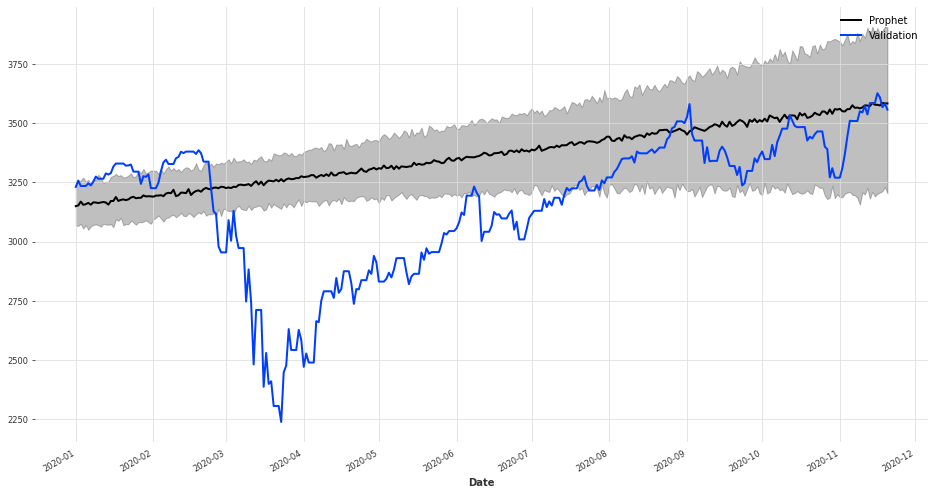

In [33]:
plt.figure(figsize=(16,8))
plt.title('prophet')
prop_pred.plot(label='Prophet')
testclose.plot(label='Validation')
plt.legend()
plt.show()

In [387]:
validation = testclose.pd_dataframe()
print("Mape for Prophet:",mean_absolute_percentage_error(validation,prop_pred.pd_dataframe()))

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


Mape for Prophet: 9.054173837882095
